# P1
# Tiankang Xie

In [2]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt


datsets = pd.read_csv("F:\SP2019\Machine_learning\HW2\kmeans.csv")
display(datsets)


,X1,X2
0,3.151899,-3.131649
1,5.456249,1.390000
2,3.524860,7.633223
3,-10.446845,-3.758548
4,1.380555,-0.147269
5,3.716183,-7.380680
6,-7.395456,-6.697694
7,5.074765,-0.434640
8,-6.858641,-0.636193
9,-9.290235,-5.306567


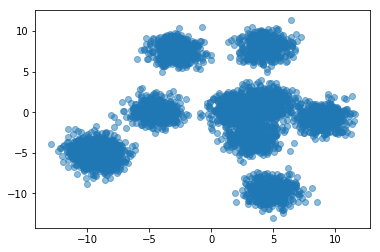

In [4]:
plt.scatter(datsets[['X1']], datsets[['X2']], alpha=0.5)
plt.show()

From the plot I can see clearly 7 clusters 

In [6]:
from sklearn.cluster import KMeans
from scipy.spatial import distance
import math
kmeans = KMeans(n_clusters = 7, random_state = 0).fit(datsets)

print(kmeans.inertia_)


16772.728155748937


In [7]:
def compute_aic(kmeans):
    m = kmeans.cluster_centers_.shape[1]
    n = len(kmeans.labels_)
    k = kmeans.cluster_centers_.shape[0]
    D = kmeans.inertia_
    return(D+2*m*k)


def compute_bic(kmeans):
    m = kmeans.cluster_centers_.shape[1]
    n = len(kmeans.labels_)
    k = kmeans.cluster_centers_.shape[0]
    D = kmeans.inertia_
    return(D + math.log(n)*m*k)

ks = range(1,10)
AICs = [0]*len(ks)
BICs = [0]*len(ks)
# run 9 times kmeans and save each result in the KMeans object
for i in ks:
    print(i)
    kmeansi = KMeans(n_clusters = i, random_state = 0).fit(datsets)
    AICs[i-1] = compute_aic(kmeansi)
    BICs[i-1] = compute_bic(kmeansi)

print(AICs)
print(BICs)

1
2
3
4
5
6
7
8
9
[325391.2934244881, 176848.76866763495, 91017.421130198, 57963.987869199904, 42142.7751206199, 29281.31963430003, 16800.728155748937, 11600.04117160283, 9703.279413708502]
[325404.32781087095, 176874.83744040062, 91056.52428934649, 58016.125414731236, 42207.947052534066, 29359.525952597025, 16891.968860428766, 11704.31626266549, 9820.588891153995]


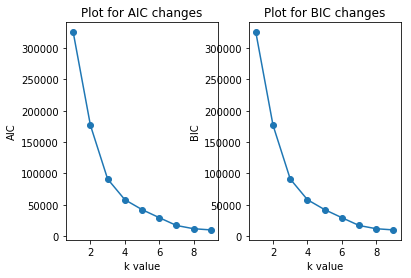

In [8]:
plt.subplot(1, 2, 1)
plt.scatter(ks,AICs)
plt.plot(ks, AICs)
plt.title("Plot for AIC changes")
plt.xlabel("k value")
plt.ylabel("AIC")

plt.subplot(1, 2, 2)

plt.scatter(ks,BICs)
plt.plot(ks, BICs)
plt.title("Plot for BIC changes")
plt.xlabel("k value")
plt.ylabel("BIC")

plt.show()

I think k value equal to 7 is the optimal. This is because k=7 is the elbow of the changes. It matches our visual inspection.

# P2

In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn_test = pd.read_csv("F:\SP2019\Machine_learning\HW2\knn_test.csv")
knn_train = pd.read_csv("F:\SP2019\Machine_learning\HW2\knn_train.csv")
knn_validate = pd.read_csv("F:\SP2019\Machine_learning\HW2\knn_val.csv")
train_x = knn_train[['X1','X2']]
train_y = knn_train[['y']]

val_x = knn_validate[['X1','X2']]
val_y = knn_validate[['y']]

test_x = knn_test[['X1','X2']]
test_y = knn_test[['y']]


knn1 = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree')
knn1.fit(train_x,train_y)
#knn1.score(train_x,train_y)

krange = range(0,10)
accu_list = [0]*len(krange)
for i in krange:
    knni = KNeighborsClassifier(n_neighbors=(i+1), algorithm='ball_tree')
    knni.fit(train_x,train_y)
    accu_list[i] = knni.score(val_x,val_y)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: DataConversionWarning: A column

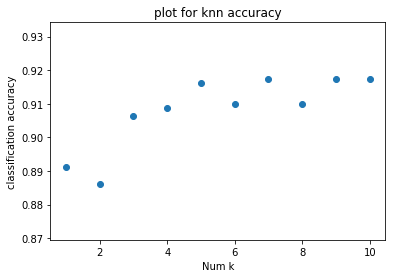

In [19]:
plt.scatter(range(1,11),accu_list)
plt.title("plot for knn accuracy")
plt.xlabel("Num k")
plt.ylabel("classification accuracy")
plt.show()

Since we see that when k =5, the value is odd, which is good for knn classifier, and it achieves a relatively high accuracy. Therefore k = 5 is used here.

In [22]:
knn5 = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree')
knni.fit(train_x,train_y)
knni.score(test_x,test_y)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


0.918

Therefore with k=5 we have a classification accuracy of 0.918

# P3

In [5]:
dt_train = pd.read_csv("F:\\SP2019\\Machine_learning\\HW2\\titanic_train.csv")
dt_val = pd.read_csv("F:\\SP2019\\Machine_learning\\HW2\\titanic_val.csv")
dt_test = pd.read_csv("F:\\SP2019\\Machine_learning\\HW2\\titanic_test.csv")

print(dt_train.shape[0])
print(dt_val.shape[0])
print(dt_test.shape[0])
print(dt_test.shape[1])
#display(dt_train)

for col in ['Sex','Embarked',"Title"]:
    dt_train[col] = dt_train[col].astype('category')
    dt_val[col] = dt_val[col].astype('category')

for col2 in ['Sex','Embarked',"Title"]:
    dt_test[col2] = dt_test[col2].astype('category')


#print(dt_val)
print(np.sum(dt_train['Survived'] == 1))


498
125
268
10
189


Train has 498 observations; test has 268 observations; validation set has 125 observations. For each point there are 10 features and 1 dependent variable.

In [7]:
print("average age:",np.mean(dt_train[['Age']]))
print("average fare:", np.mean(dt_train[['Fare']]))

average age: Age    28.983936
dtype: float64
average fare: Fare    30.335199
dtype: float64


In [6]:
dt_train.dtypes
from sklearn.tree import DecisionTreeClassifier
dttrain_y = dt_train[['Survived']]
dttrain_x = dt_train.drop(['Survived'], axis=1)
dtval_y = dt_val[['Survived']]
dtval_x = dt_val.drop(['Survived'], axis=1)



dtclass = DecisionTreeClassifier()
dtclass.fit(dttrain_x,dttrain_y)

numtrees = range(1,11)
valscores = []
for i in numtrees:
    dtclassi = DecisionTreeClassifier(max_depth=i)
    dtclassi.fit(dttrain_x,dttrain_y)
    valscores.append(dtclassi.score(dtval_x,dtval_y))

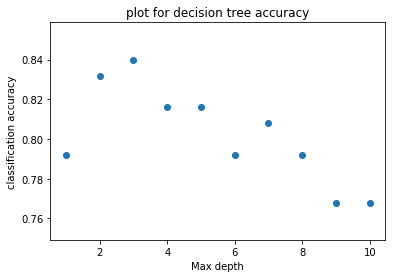

In [7]:
plt.scatter(numtrees,valscores)
plt.title("plot for decision tree accuracy")
plt.xlabel("Max depth")
plt.ylabel("classification accuracy")
plt.show()  

We found that the optimal depth is 3.

In [58]:
newframe_x = [dttrain_x,dtval_x]
newframe_y = [dttrain_y,dtval_y]
cbd_train_x = pd.concat(newframe_x)
cbd_train_y = pd.concat(newframe_y)


dtclassf = DecisionTreeClassifier(max_depth = 3)
dtclassf.fit(cbd_train_x,cbd_train_y)
predvals = dtclassf.predict(dt_test)

print(dtclassf.score(cbd_train_x,cbd_train_y))

0.8346709470304976


In [59]:
print(predvals)
import csv

with open("F:\Fall2018\decision.csv", 'w', newline='') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    wr.writerow(predvals)
    

[1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1
 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 1 1 0 1 0 0 0 0 0]


In [14]:
>>> from sklearn.ensemble import RandomForestClassifier
>>> from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [20,50, 80, 90, 100,150,250],
    'n_estimators': [50, 200, 300,400, 500,800,1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 10)
grid_search.fit(cbd_train_x, cbd_train_y)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y wa

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'bootstrap': [True], 'max_depth': [20, 50, 80, 90, 100, 150, 250], 'n_estimators': [50, 200, 300, 400, 500, 800, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [15]:
best_grid = grid_search.best_estimator_
print(best_grid)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=100, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


From the results we see that the best grid will be depth 100 and maximum tree 500.

In [60]:
rff = RandomForestClassifier(n_estimators=500,max_depth=100)
rff.fit(cbd_train_x, cbd_train_y)
rff_pred = rff.predict(dt_test)

print(rff.score(cbd_train_x,cbd_train_y))

print(rff_pred)

with open("F:\Fall2018\RF.csv", 'w', newline='') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    wr.writerow(rff_pred)
    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.9903691813804173
[1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 1 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1
 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1
 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1
 0 0 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 1 1 1 0 0 0 0 1]


In [52]:
from sklearn.svm import SVC  
svc1 = SVC(kernel='linear',C=1,gamma = 'scale')
svc2 = SVC(kernel ='poly',degree = 2, C=1,gamma = 'scale')
svc3 = SVC(kernel = 'rbf',C=1,gamma = 'scale')

svc1.fit(dttrain_x,dttrain_y)
svc2.fit(dttrain_x,dttrain_y)
svc3.fit(dttrain_x,dttrain_y)


print(svc1.score(dtval_x,dtval_y))
print(svc2.score(dtval_x,dtval_y))
print(svc3.score(dtval_x,dtval_y))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.808
0.832
0.752


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


From the results we see that polynomial with degree 2 kernel works the best.

In [62]:
svc2_predvals = svc2.predict(dt_test)
print(svc2_predvals)
with open("F:\Fall2018\SVC.csv", 'w', newline='') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    wr.writerow(svc2_predvals)

[0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1
 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1
 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0
 1 1 0 1 0 0 0 0 0]
